# Exercício 1

In [459]:
import matplotlib.pylab as plt
import numpy as np

import matplotlib.style as style 
style.use('fivethirtyeight')

plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 7, 5


### Defining the sinusoidal function

Sampling period: 0.01 s, sampling frequency: 300.00 Hz
Sine frequency: 100 Hz


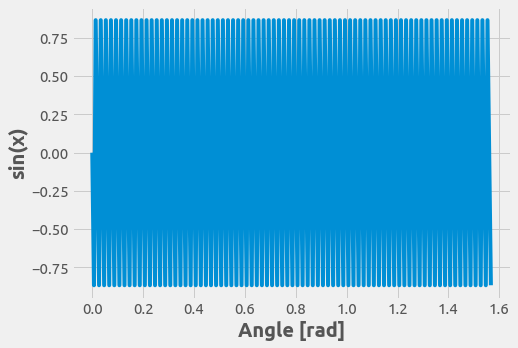

In [460]:
# sampling rate
fs = 300;  
# sampling interval
Ts = 1.0/Fs; 
# time vector
pts = np.arange(start=0, stop=np.pi/2, step=Ts)
num_pts = len(pts)
print(f'Sampling period: {sample_spacing:.2f} s, sampling frequency: {fs:.2f} Hz')

# Sine frequency
f = 100
print(f'Sine frequency: {f} Hz')
# Sinusoidal function
s = np.sin(2*np.pi*f*pts)

# Plotting
plt.plot(pts, s)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()


### Defining the Gaussian noise

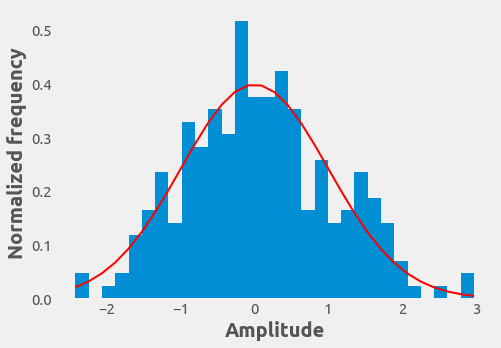

In [461]:
# Defining mean and standard deviation
mu, sigma = 0, 1
# Defing noise
n = np.random.normal(mu, sigma, num_pts)

# Plotting (what should be a Normal Distribution) histogram
count, bins, ignored = plt.hist(n, 30, density=True)
# Comparing with normal curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.xlabel('Amplitude')
plt.ylabel('Normalized frequency')
plt.axis('tight')
plt.grid(False)
plt.show()

### Adding noise to sine function

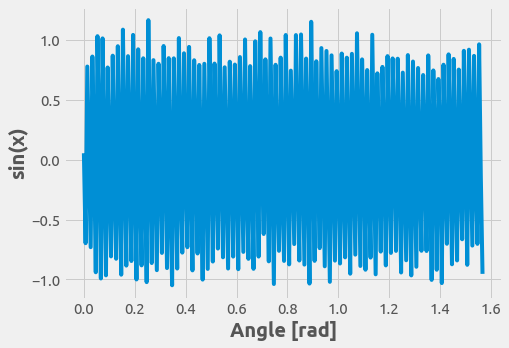

In [462]:
# Noise gain
k = 0.1

# Adding noise to sine
x = s + k*n

# Plotting
plt.plot(pts, x)
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

### Estimating sine frequency from DFT plot

Text(0, 0.5, '|X(freq)|')

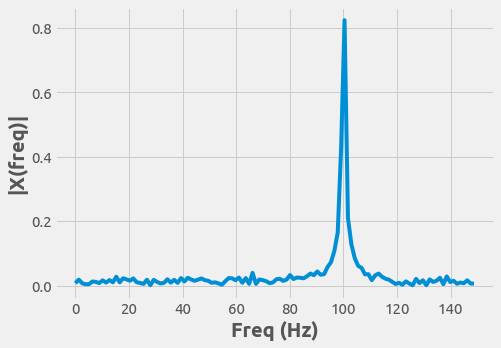

In [463]:
k = np.arange(num_pts)

T = num_pts/fs
frq = k/T 

# One side frequency range
num_pts_half = int(num_pts/2)
frq = frq[range(num_pts_half)]

# FFT computing and normalization
X = np.fft.fft(x)/num_pts_half
X = X[range(num_pts_half)]

# Plotting the spectrum
plt.plot(frq, abs(X)) 
plt.xlabel('Freq (Hz)')
plt.ylabel('|X(freq)|')

In [464]:
argmax = np.argmax(X)
estimated_freq = frq[argmax]
print(f'Estimated frequency: {estimated_freq:.2f} Hz')

Estimated frequency: 100.42 Hz
